# Imarticus Project : Bank Credit Card

## Problem Statement 
### The banks with the intent of credit card were more focused on the number of customers using their credit service but the drawback of them not being able to pay back the credit in time was an issue that soon followed, a system was in need to effectively decide the credit limit to be allowed to a person based on his previous credit history. Accuracy, Sensitivity, Specificity and area under the ROC curve. Build a classification model using support vector classifier to predict the credibility of the customer, in order to minimize the risk and maximize the profit of a bank.


# Step-1 : Reading file and getting familiar with data


##  1.1 Imports

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


## 1.2 Reading file


In [55]:
CCDP=pd.read_csv(r'C:\Users\Sahil Wasankar\Desktop\Imarticus Final Project\BankCrediTCard.csv')

## 1.3 Checking data shape (row and column count) & observe few of records

In [3]:
CCDP.head(10)

,Customer ID,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,1
1,2,220000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,24332.0,14848.0,15548.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,29324.0,28858.0,28547.0,3000.0,2029.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,18146.0,18131.0,3000.0,36672.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,29394.0,18618.0,20024.0,3600.0,2725.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473844.0,66000.0,40000.0,59000.0,30339.0,13750.0,13770.0,0
7,8,200000.0,2,2,2,23,0,0,0,0,...,222.0,-158.0,567.0,390.0,602.0,0.0,581.0,1687.0,1542.0,0
8,9,240000.0,2,3,1,28,0,0,2,0,...,22222.0,11783.0,3718.0,3339.0,0.0,552.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,0,0,0,0,...,0.0,13007.0,13812.0,0.0,0.0,0.0,13007.0,1133.0,0.0,0


In [4]:
CCDP.shape

(30000, 25)

In [56]:
CCDP.Default_Payment.value_counts()

0    23364
1     6636
Name: Default_Payment, dtype: int64

## 1.4  Check for Null or missing values

In [6]:
CCDP.isna().sum()

Customer ID               0
Credit_Amount             0
Gender                    0
Academic_Qualification    0
Marital                   0
Age_Years                 0
Repayment_Status_Jan      0
Repayment_Status_Feb      0
Repayment_Status_March    0
Repayment_Status_April    0
Repayment_Status_May      0
Repayment_Status_June     0
Jan_Bill_Amount           0
Feb_Bill_Amount           0
March_Bill_Amount         0
April_Bill_Amount         0
May_Bill_Amount           0
June_Bill_Amount          0
Previous_Payment_Jan      0
Previous_Payment_Feb      0
Previous_Payment_March    0
Previous_Payment_April    0
Previous_Payment_May      0
Previous_Payment_June     0
Default_Payment           0
dtype: int64

# Step -2 :  Exploratory Data Analysis (EDA)

## 2.1 Check for distribution of target variable (Default_Payment)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Default_Payment', ylabel='count'>

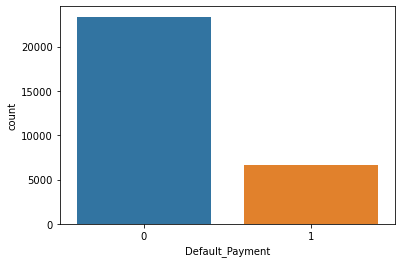

In [7]:
sns.countplot(CCDP['Default_Payment'])

Insight Obatained : Here we can see that 23364 records are classified into 0 and 6636 are classified into 1. Problem of Class                       Imbalance Observed.

## 2.2 Removing Customer ID column

In [57]:
CCDP = CCDP.drop(['Customer ID'],axis=1)

In [9]:
CCDP.head()

,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,20000.0,2,2,1,24,2,2,0,0,0,...,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,1
1,220000.0,2,2,2,26,0,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,24332.0,14848.0,15548.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,29324.0,28858.0,28547.0,3000.0,2029.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,0,0,0,0,0,...,20940.0,18146.0,18131.0,3000.0,36672.0,10000.0,9000.0,689.0,679.0,0


In [10]:
CCDP.shape

(30000, 24)

## 2.3 Corrplot

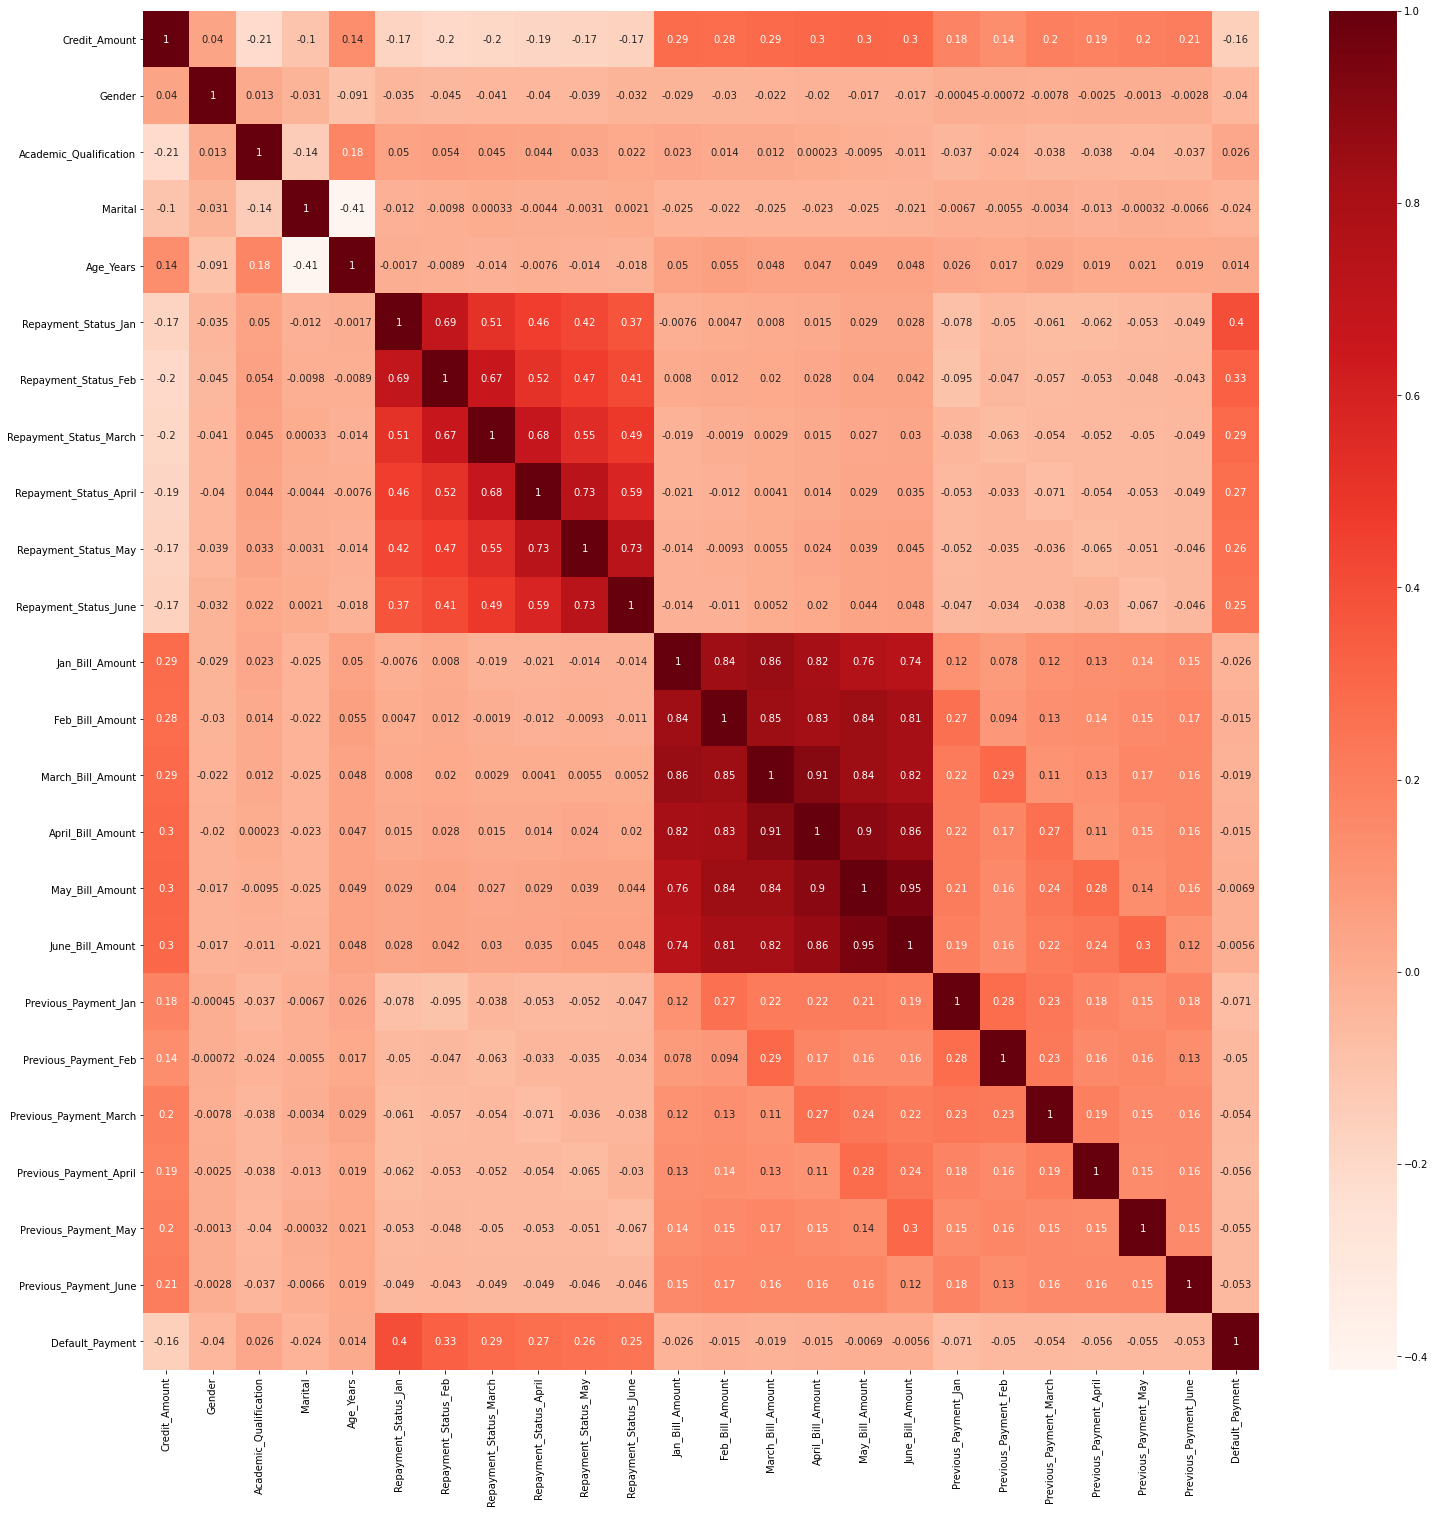

In [11]:
plt.figure(figsize=(25,25))
cor = CCDP.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## 2.4 Variance Inflation Factor (VIF)

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [13]:
vif = pd.DataFrame

In [14]:
vif = [variance_inflation_factor(CCDP.values, i) for i in range(CCDP.shape[1])]

In [15]:
print(vif)

[4.1458863941452035, 9.157414784325292, 6.636486090642754, 6.327312328005439, 11.136436057691947, 2.584809486949314, 3.025630444404547, 2.8825773777740116, 3.2072039084475183, 3.4125930391789665, 2.440261027370331, 7.703137869750921, 8.60229770585039, 16.912540699356477, 16.934078692925254, 28.47838446068882, 20.612696340740527, 1.4628342675431691, 1.6747014010063552, 1.6062041445575956, 1.544877387399058, 1.7663112247639232, 1.2534704221120114, 1.5667325719543894]


In [16]:
vif_table = pd.concat([pd.Series(CCDP.columns),pd.Series(vif),],axis=1)
vif_table.rename(columns={0:"Columns",1:"VIF-Values"},inplace=True)

In [17]:
vif_table.sort_values('VIF-Values',ascending=False)

,Columns,VIF-Values
15,May_Bill_Amount,28.478384
16,June_Bill_Amount,20.612696
14,April_Bill_Amount,16.934079
13,March_Bill_Amount,16.912541
4,Age_Years,11.136436
1,Gender,9.157415
12,Feb_Bill_Amount,8.602298
11,Jan_Bill_Amount,7.703138
2,Academic_Qualification,6.636486
3,Marital,6.327312


Insight Obtained:

Columns (4,13,14,15,16) have Higher Multicoliinearity (i.e >10)

Columns (1,12,2,3) have Moderate Multicollinearity (i.e between(5-10)) 

Rest of The columns have Low Multicollinearity (i.e <5)

# Step 3 Sampling

## 3.1 Splitting into X and Y

In [58]:
CCDP_x=CCDP.loc[:,CCDP.columns!='Default_Payment']
CCDP_y=CCDP.loc[:,CCDP.columns=='Default_Payment']

## 3.2 Splitting into X-Train and Y-Train

In [59]:
from sklearn.model_selection import train_test_split
CCDP_x_train,CCDP_x_test,CCDP_y_train,CCDP_y_test=train_test_split(CCDP_x,CCDP_y,test_size=.2,random_state=619)

## 3.3 Application of SMOTE to Resolve Class Imbalance

In [60]:
import imblearn
from imblearn.over_sampling import SMOTE
import numpy as np
sm = SMOTE()

In [61]:
CCDP_xtrain,CCDP_ytrain = sm.fit_sample(CCDP_x_train,CCDP_y_train)

In [62]:
CCDP_ytrain

,Default_Payment
0,0
1,0
2,0
3,0
4,0
...,...
37277,1
37278,1
37279,1
37280,1


In [88]:
type(CCDP_ytrain)

pandas.core.frame.DataFrame

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Default_Payment', ylabel='count'>

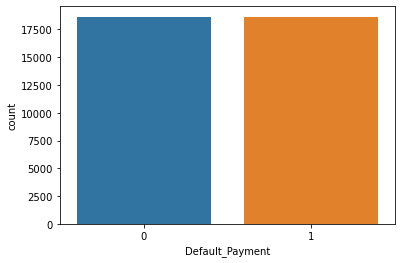

In [63]:
sns.countplot(CCDP_ytrain['Default_Payment'])

In [23]:
CCDP_ytrain['Default_Payment'].value_counts()

1    18641
0    18641
Name: Default_Payment, dtype: int64

# Step 4 Model Making

## 4.1 Making an Logistic Regression Model

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

logisticmodel=LogisticRegression()
logisticmodel.fit(CCDP_xtrain,CCDP_ytrain)
prediction_logistic=logisticmodel.predict(CCDP_x_test)
tab1=confusion_matrix(prediction_logistic,CCDP_y_test)
tab1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[3516,  726],
       [1207,  551]], dtype=int64)

In [25]:
acc1=tab1.diagonal().sum()* 100 / tab1.sum()
acc1

67.78333333333333

Insight Obtained : We can see that ACCURACY here is 67.783

## 4.2 Making an Decision Tree Model

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(CCDP_xtrain,CCDP_ytrain)
prediction_dt = dtree.predict(CCDP_x_test)
tab2 = confusion_matrix(prediction_dt,CCDP_y_test)
tab2

array([[3595,  673],
       [1128,  604]], dtype=int64)

In [27]:
acc2 = tab2.diagonal().sum()  *100/tab2.sum()
acc2

69.98333333333333

Insight Obtained : We can see that ACCURACY here us 69.983

##  4.3 Making an Random Forest Model

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=50)
rfc.fit(CCDP_xtrain,CCDP_ytrain)
prediction_rfc=rfc.predict(CCDP_x_test)
tab3=confusion_matrix(prediction_rfc,CCDP_y_test)
tab3

<ipython-input-28-f88755cb7390>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(CCDP_xtrain,CCDP_ytrain)


array([[4142,  665],
       [ 581,  612]], dtype=int64)

In [29]:
acc3=tab3.diagonal().sum()  *100/tab3.sum()
acc3

79.23333333333333

Insight Obtained: Here we can see that the ACCURACY is 79.233

##  4.4 Applying Ada Boost on Decision Tree Classifier

In [30]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(  DecisionTreeClassifier(),n_estimators=15)
abc.fit(CCDP_xtrain,CCDP_ytrain)
prediction_abc=abc.predict(CCDP_x_test)
tab4=confusion_matrix(prediction_abc,CCDP_y_test)
tab4

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([[3896,  669],
       [ 827,  608]], dtype=int64)

In [31]:
acc4=tab4.diagonal().sum()  *100/tab4.sum()
acc4

75.06666666666666

Insight Obtained: Here we can see that ACCURACY is 75.066

##  4.5 Making an K-Nearest Neighbour Model

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(CCDP_xtrain,CCDP_ytrain)
prediction_knn=knn.predict(CCDP_x_test)
tab5=confusion_matrix(prediction_knn,CCDP_y_test)
tab5

<ipython-input-32-a21b596b2422>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(CCDP_xtrain,CCDP_ytrain)


array([[2997,  589],
       [1726,  688]], dtype=int64)

In [33]:
acc5=tab5.diagonal().sum()  *100/tab5.sum()
acc5

61.416666666666664

Insight Obtained : Here we can see that ACCURACY is 61.416

## 4.6 Applying Gradient Boosting 

In [34]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=126)
clf.fit(CCDP_xtrain, CCDP_ytrain)
prediction_clf=clf.predict(CCDP_x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [35]:
tab6 = confusion_matrix(prediction_clf,CCDP_y_test)
tab6

array([[3899,  570],
       [ 824,  707]], dtype=int64)

In [36]:
acc6 = tab6.diagonal().sum()  *100/tab6.sum()
acc6

76.76666666666667

Insight Obtained: Here we can see that ACCURACY is 76.767

## 4.7 Applying XGBoost

In [37]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(CCDP_xtrain,CCDP_ytrain)
prediction_XGB = model.predict(CCDP_x_test)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[17:40:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [38]:
tab7 = confusion_matrix(prediction_XGB,CCDP_y_test)
tab7

array([[4102,  682],
       [ 621,  595]], dtype=int64)

In [39]:
acc7 = tab7.diagonal().sum()  *100/tab7.sum()
acc7

78.28333333333333

Insight Obtained: Here we can see that ACCURACY is 78.283

## 4.8 Making an Support Vector Machine Model

In [40]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(CCDP_xtrain,CCDP_ytrain)
prediction_SVM=svc_model.predict(CCDP_x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [41]:
tab9 = confusion_matrix(prediction_SVM,CCDP_y_test)
tab9

array([[2384,  344],
       [2339,  933]], dtype=int64)

In [42]:
acc9 = tab9.diagonal().sum()  *100/tab9.sum()
acc9

55.28333333333333

Insight Obtained : Here we can see that ACCURACY is 55.283

# Step 5 - Evaluate All Models

## 5.1 Accuracy Scores of all the Models

In [43]:
from sklearn.metrics import accuracy_score
Acc1_Logistic       = accuracy_score(CCDP_y_test,prediction_logistic)
Acc2_Decision_Tree  = accuracy_score(CCDP_y_test,prediction_dt)
Acc3_Random_Forest  = accuracy_score(CCDP_y_test,prediction_rfc)
Acc4_Ada_Boost      = accuracy_score(CCDP_y_test,prediction_abc)
Acc5_KNN            = accuracy_score(CCDP_y_test,prediction_knn)
Acc6_Gradient_Boost = accuracy_score(CCDP_y_test,prediction_clf)
Acc7_XGBoost        = accuracy_score(CCDP_y_test,prediction_XGB)
Acc8_SVM            = accuracy_score(CCDP_y_test,prediction_SVM)
Accuracy_all        = [Acc1_Logistic,Acc2_Decision_Tree,Acc3_Random_Forest,Acc4_Ada_Boost,Acc5_KNN,Acc6_Gradient_Boost,Acc7_XGBoost,Acc8_SVM]

## 5.2 Precision Scores of all the models

In [44]:
from sklearn.metrics import precision_score
Prec1_Logistic       = precision_score(CCDP_y_test,prediction_logistic)
Prec2_Decision_Tree  = precision_score(CCDP_y_test,prediction_dt)
Prec3_Random_Forest  = precision_score(CCDP_y_test,prediction_rfc)
Prec4_Ada_Boost      = precision_score(CCDP_y_test,prediction_abc)
Prec5_KNN            = precision_score(CCDP_y_test,prediction_knn)
Prec6_Gradient_Boost = precision_score(CCDP_y_test,prediction_clf)
Prec7_XGBoost        = precision_score(CCDP_y_test,prediction_XGB)
Prec8_SVM            = precision_score(CCDP_y_test,prediction_SVM)
Precision_all        = [Prec1_Logistic,Prec2_Decision_Tree,Prec3_Random_Forest,Prec4_Ada_Boost,Prec5_KNN,Prec6_Gradient_Boost,Prec7_XGBoost,Prec8_SVM]

## 5.3 Recall/Sensitivity Scores of all the models

In [45]:
from sklearn.metrics import recall_score
Sens1_Logistic       = recall_score(CCDP_y_test,prediction_logistic)
Sens2_Decision_Tree  = recall_score(CCDP_y_test,prediction_dt)
Sens3_Random_Forest  = recall_score(CCDP_y_test,prediction_rfc)
Sens4_Ada_Boost      = recall_score(CCDP_y_test,prediction_abc)
Sens5_KNN            = recall_score(CCDP_y_test,prediction_knn)
Sens6_Gradient_Boost = recall_score(CCDP_y_test,prediction_clf)
Sens7_XGBoost        = recall_score(CCDP_y_test,prediction_XGB)
Sens8_SVM            = recall_score(CCDP_y_test,prediction_SVM)
Recall_all           =[Sens1_Logistic,Sens2_Decision_Tree,Sens3_Random_Forest,Sens4_Ada_Boost,Sens5_KNN,Sens6_Gradient_Boost,Sens7_XGBoost,Sens8_SVM]

## 5.4 Specificity on class '0'

In [46]:
from sklearn.metrics import recall_score
Spec_Logistic       = recall_score(CCDP_y_test,prediction_logistic,pos_label=0)
Spec_Decision_Tree  = recall_score(CCDP_y_test,prediction_dt,pos_label=0)
Spec_Random_Forest  = recall_score(CCDP_y_test,prediction_rfc,pos_label=0)
Spec_Ada_Boost      = recall_score(CCDP_y_test,prediction_abc,pos_label=0)
Spec_KNN            = recall_score(CCDP_y_test,prediction_knn,pos_label=0)
Spec_Gradient_Boost = recall_score(CCDP_y_test,prediction_clf,pos_label=0)
Spec_XGBoost        = recall_score(CCDP_y_test,prediction_XGB,pos_label=0)
Spec_SVM            = recall_score(CCDP_y_test,prediction_SVM,pos_label=0)
Spec_all            = [Spec_Logistic,Spec_Decision_Tree,Spec_Random_Forest,Spec_Ada_Boost,Spec_KNN,Spec_Gradient_Boost,Spec_XGBoost,Spec_SVM]

## 5.5 AUROC

In [47]:

auroc_Logistic       = sklearn.metrics.roc_auc_score(CCDP_y_test,prediction_logistic)
auroc_Decision_Tree  = sklearn.metrics.roc_auc_score(CCDP_y_test,prediction_dt)
auroc_Random_Forest  = sklearn.metrics.roc_auc_score(CCDP_y_test,prediction_rfc)
auroc_Ada_Boost      = sklearn.metrics.roc_auc_score(CCDP_y_test,prediction_abc)
auroc_KNN            = sklearn.metrics.roc_auc_score(CCDP_y_test,prediction_knn)
auroc_Gradient_Boost = sklearn.metrics.roc_auc_score(CCDP_y_test,prediction_clf)
auroc_XGBoost        = sklearn.metrics.roc_auc_score(CCDP_y_test,prediction_XGB)
auroc_SVM            = sklearn.metrics.roc_auc_score(CCDP_y_test,prediction_SVM)
auroc_all            = [auroc_Logistic,auroc_Decision_Tree,auroc_Random_Forest,auroc_Ada_Boost,auroc_KNN,auroc_Gradient_Boost,auroc_XGBoost,auroc_SVM]

## 5.6 F-1 Score

In [64]:
f1_Logistic       = sklearn.metrics.f1_score(CCDP_y_test,prediction_logistic)
f1_Decision_Tree  = sklearn.metrics.f1_score(CCDP_y_test,prediction_dt)
f1_Random_Forest  = sklearn.metrics.f1_score(CCDP_y_test,prediction_rfc)
f1_Ada_Boost      = sklearn.metrics.f1_score(CCDP_y_test,prediction_abc)
f1_KNN            = sklearn.metrics.f1_score(CCDP_y_test,prediction_knn)
f1_Gradient_Boost = sklearn.metrics.f1_score(CCDP_y_test,prediction_clf)
f1_XGBoost        = sklearn.metrics.f1_score(CCDP_y_test,prediction_XGB)
f1_SVM            = sklearn.metrics.f1_score(CCDP_y_test,prediction_SVM)
f1_all            = [f1_Logistic,f1_Decision_Tree,f1_Random_Forest,f1_Ada_Boost,f1_KNN,f1_Gradient_Boost,f1_XGBoost,f1_SVM]

## 5.7 Comparision

In [65]:
Names = ['Logistic Regression','Decision Tree','Random Forest','Ada Boost','K-Nearest Neighbours','Gradient-Boosting','XG-Boost','SVM']
df = pd.DataFrame(list(zip(Names,Accuracy_all,Precision_all,Recall_all,Spec_all,auroc_all,f1_all)),columns=['Model_Name', 'Accuracy', 'Precision',"Recall/Sensitivity","Specificity","AUROC","F-1 Score"])

In [66]:
df.sort_values(by=['Accuracy'], ascending=False)

,Model_Name,Accuracy,Precision,Recall/Sensitivity,Specificity,AUROC,F-1 Score
2,Random Forest,0.792333,0.512992,0.479248,0.876985,0.678117,0.495547
6,XG-Boost,0.782833,0.489309,0.465936,0.868516,0.667226,0.477337
5,Gradient-Boosting,0.767667,0.461790,0.553641,0.825535,0.689588,0.503561
3,Ada Boost,0.750667,0.423693,0.476116,0.824899,0.650508,0.448378
1,Decision Tree,0.699833,0.348730,0.472984,0.761169,0.617076,0.401462
0,Logistic Regression,0.677833,0.313424,0.431480,0.744442,0.587961,0.363097
4,K-Nearest Neighbours,0.614167,0.285004,0.538763,0.634554,0.586659,0.372799
7,SVM,0.552833,0.285147,0.730619,0.504764,0.617691,0.410200


# Step 6 Feature Selection

In [89]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeClassifier
from boruta import BorutaPy
from sklearn.feature_selection import RFE

## 6.1 Boruta

In [90]:
CCDP_x1 = np.array(CCDP_x)
CCDP_y1 = np.array(CCDP_y)
rf = RandomForestClassifier()
boruta_feature_selector = BorutaPy(rf, random_state = 111, max_iter = 25, perc = 100, verbose = 2)
boruta_feature_selector.fit(CCDP_x1, CCDP_y1)
df4 = pd.DataFrame({"Column name": CCDP_x.columns, "Feature": boruta_feature_selector.support_})
df4

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	1 / 25
Confirmed: 	0
Tentative: 	23
Rejected: 	0


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	2 / 25
Confirmed: 	0
Tentative: 	23
Rejected: 	0


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	3 / 25
Confirmed: 	0
Tentative: 	23
Rejected: 	0


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	4 / 25
Confirmed: 	0
Tentative: 	23
Rejected: 	0


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	5 / 25
Confirmed: 	0
Tentative: 	23
Rejected: 	0


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	6 / 25
Confirmed: 	0
Tentative: 	23
Rejected: 	0


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	7 / 25
Confirmed: 	0
Tentative: 	23
Rejected: 	0


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	8 / 25
Confirmed: 	2
Tentative: 	0
Rejected: 	21


BorutaPy finished running.

Iteration: 	9 / 25
Confirmed: 	2
Tentative: 	0
Rejected: 	21


,Column name,Feature
0,Credit_Amount,False
1,Gender,False
2,Academic_Qualification,False
3,Marital,False
4,Age_Years,False
5,Repayment_Status_Jan,True
6,Repayment_Status_Feb,True
7,Repayment_Status_March,False
8,Repayment_Status_April,False
9,Repayment_Status_May,False


## 6.2 Recursive Feature Selection

In [91]:
rfc = RandomForestClassifier()
rfe_rfc = RFE(rfc, 10) #...top 5 important feature
rfe_rfc.fit(CCDP_x, CCDP_y)
df5 = pd.DataFrame({"Column name": CCDP_x.columns, "Feature": rfe_rfc.support_})
df5

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

,Column name,Feature
0,Credit_Amount,False
1,Gender,False
2,Academic_Qualification,False
3,Marital,False
4,Age_Years,True
5,Repayment_Status_Jan,True
6,Repayment_Status_Feb,False
7,Repayment_Status_March,False
8,Repayment_Status_April,False
9,Repayment_Status_May,False


## 6.3 Feature Importance By Decision Tree

In [92]:
dtree_fi = DecisionTreeClassifier()
dtree_fi.fit(CCDP_x,CCDP_y)
df6 = pd.DataFrame({"Feauture": CCDP_x.columns, "Importance": dtree_fi.feature_importances_})
df6

,Feauture,Importance
0,Credit_Amount,0.050943
1,Gender,0.011222
2,Academic_Qualification,0.023392
3,Marital,0.015830
4,Age_Years,0.068843
5,Repayment_Status_Jan,0.157622
6,Repayment_Status_Feb,0.032313
7,Repayment_Status_March,0.005787
8,Repayment_Status_April,0.003315
9,Repayment_Status_May,0.007973


## 6.4 Feature Importance By Random Forest

In [93]:
rfc_fi = RandomForestClassifier()
rfc_fi.fit(CCDP_x, CCDP_y)
df7 = pd.DataFrame({"Feauture": CCDP_x.columns, "Importance": rfc_fi.feature_importances_})
df7

<ipython-input-93-41c477fe33a7>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_fi.fit(CCDP_x, CCDP_y)


,Feauture,Importance
0,Credit_Amount,0.055823
1,Gender,0.012085
2,Academic_Qualification,0.021470
3,Marital,0.014307
4,Age_Years,0.069788
5,Repayment_Status_Jan,0.088339
6,Repayment_Status_Feb,0.045429
7,Repayment_Status_March,0.025769
8,Repayment_Status_April,0.015707
9,Repayment_Status_May,0.016878


## 6.5 Selection of Features

In [94]:
Feature_selection = pd.DataFrame({"Feauture": CCDP_x.columns,"Importance(Decision Tree)": dtree_fi.feature_importances_, "Importance (RandomForest)": rfc_fi.feature_importances_,
                                 "Boruta-Support": boruta_feature_selector.support_,"RFE-Support": rfe_rfc.support_ })
Feature_selection.sort_values(by=['Importance (RandomForest)'], ascending=False)

,Feauture,Importance(Decision Tree),Importance (RandomForest),Boruta-Support,RFE-Support
5,Repayment_Status_Jan,0.157622,0.088339,True,True
4,Age_Years,0.068843,0.069788,False,True
11,Jan_Bill_Amount,0.073636,0.064325,False,True
12,Feb_Bill_Amount,0.051188,0.057887,False,True
0,Credit_Amount,0.050943,0.055823,False,False
13,March_Bill_Amount,0.050877,0.054712,False,True
14,April_Bill_Amount,0.053933,0.053650,False,True
16,June_Bill_Amount,0.048973,0.053014,False,True
15,May_Bill_Amount,0.051405,0.052805,False,True
17,Previous_Payment_Jan,0.045794,0.050649,False,True


From here we observe that Martial and Gender are Least Desirable so we are removing them

In [67]:
new_CCDP_x_train = CCDP_xtrain.drop(['Marital','Gender'],axis=1)
new_CCDP_x_test  = CCDP_x_test.drop(['Marital','Gender'],axis=1)


# Step 7 Rebuilding the models 

##  7.1 Imports

In [95]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

## 7.2 Creating instances of all the models at once

In [96]:
logisticmodel2 = LogisticRegression()
dtree2         = DecisionTreeClassifier()
rfc2           = RandomForestClassifier(n_estimators=50)
abc2           = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=15)
knn2           = KNeighborsClassifier(n_neighbors=5)
clf2           = GradientBoostingClassifier(random_state=126)
model2         = XGBClassifier()
svc_model2     = SVC()

## 7.3 Fitting the Training and Testing Data in all the models at once

In [97]:
logisticmodel2.fit(new_CCDP_x_train,CCDP_ytrain)
dtree2.fit(new_CCDP_x_train,CCDP_ytrain)
rfc2.fit(new_CCDP_x_train,CCDP_ytrain)
abc2.fit(new_CCDP_x_train,CCDP_ytrain)
knn2.fit(new_CCDP_x_train,CCDP_ytrain)
clf2.fit(new_CCDP_x_train,CCDP_ytrain)
model2.fit(new_CCDP_x_train,CCDP_ytrain)
svc_model2.fit(new_CCDP_x_train,CCDP_ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-97-f7846c7a473c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc2.fit(new_CCDP_x_train,CCDP_ytrain)
C:\

[23:24:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

## 7.4 Predictions on new models

In [98]:
prediction_logistic2 = logisticmodel2.predict(new_CCDP_x_test)
prediction_dt2       = dtree2.predict(new_CCDP_x_test)
prediction_rfc2      = rfc2.predict(new_CCDP_x_test)
prediction_abc2      = abc2.predict(new_CCDP_x_test)
prediction_clf2      = clf2.predict(new_CCDP_x_test)
prediction_knn2      = knn2.predict(new_CCDP_x_test)
prediction_XGB2      = model2.predict(new_CCDP_x_test)
prediction_SVM2      = svc_model2.predict(new_CCDP_x_test)

# Step 8 Evaluating/Comparing the new Models Accuracy

## 8.1 Accuracy

In [99]:
from sklearn.metrics import accuracy_score
Acc1_Logistic2       = accuracy_score(CCDP_y_test,prediction_logistic2)
Acc2_Decision_Tree2  = accuracy_score(CCDP_y_test,prediction_dt2)
Acc3_Random_Forest2  = accuracy_score(CCDP_y_test,prediction_rfc2)
Acc4_Ada_Boost2      = accuracy_score(CCDP_y_test,prediction_abc2)
Acc5_KNN2            = accuracy_score(CCDP_y_test,prediction_knn2)
Acc6_Gradient_Boost2 = accuracy_score(CCDP_y_test,prediction_clf2)
Acc7_XGBoost2        = accuracy_score(CCDP_y_test,prediction_XGB2)
Acc8_SVM2            = accuracy_score(CCDP_y_test,prediction_SVM2)
Accuracy_all2        = [Acc1_Logistic2,Acc2_Decision_Tree2,Acc3_Random_Forest2,Acc4_Ada_Boost2,Acc5_KNN2,Acc6_Gradient_Boost2,Acc7_XGBoost2,Acc8_SVM2]

[0.6841666666666667, 0.7048333333333333, 0.7943333333333333, 0.7593333333333333, 0.6056666666666667, 0.7741666666666667, 0.7916666666666666]


## 8.2 Precision Score

In [100]:
from sklearn.metrics import precision_score
Prec1_Logistic2       = precision_score(CCDP_y_test,prediction_logistic2)
Prec2_Decision_Tree2  = precision_score(CCDP_y_test,prediction_dt2)
Prec3_Random_Forest2  = precision_score(CCDP_y_test,prediction_rfc2)
Prec4_Ada_Boost2      = precision_score(CCDP_y_test,prediction_abc2)
Prec5_KNN2            = precision_score(CCDP_y_test,prediction_knn2)
Prec6_Gradient_Boost2 = precision_score(CCDP_y_test,prediction_clf2)
Prec7_XGBoost2        = precision_score(CCDP_y_test,prediction_XGB2)
Prec8_SVM2            = precision_score(CCDP_y_test,prediction_SVM2)
Precision_all2        = [Prec1_Logistic2,Prec2_Decision_Tree2,Prec3_Random_Forest2,Prec4_Ada_Boost2,Prec5_KNN2,Prec6_Gradient_Boost2,Prec7_XGBoost2,Prec8_SVM2]

## 8.3 Recall Score

In [101]:
from sklearn.metrics import recall_score
Sens1_Logistic2       = recall_score(CCDP_y_test,prediction_logistic2)
Sens2_Decision_Tree2  = recall_score(CCDP_y_test,prediction_dt2)
Sens3_Random_Forest2  = recall_score(CCDP_y_test,prediction_rfc2)
Sens4_Ada_Boost2      = recall_score(CCDP_y_test,prediction_abc2)
Sens5_KNN2            = recall_score(CCDP_y_test,prediction_knn2)
Sens6_Gradient_Boost2 = recall_score(CCDP_y_test,prediction_clf2)
Sens7_XGBoost2        = recall_score(CCDP_y_test,prediction_XGB2)
Sens8_SVM2            = recall_score(CCDP_y_test,prediction_SVM2)
Recall_all2           =[Sens1_Logistic2,Sens2_Decision_Tree2,Sens3_Random_Forest2,Sens4_Ada_Boost2,Sens5_KNN2,Sens6_Gradient_Boost2,Sens7_XGBoost2,Sens8_SVM2]

## 8.4 Specificity

In [107]:
from sklearn.metrics import recall_score
Spec_Logistic2       = recall_score(CCDP_y_test,prediction_logistic2,pos_label=0)
Spec_Decision_Tree2  = recall_score(CCDP_y_test,prediction_dt2,pos_label=0)
Spec_Random_Forest2  = recall_score(CCDP_y_test,prediction_rfc2,pos_label=0)
Spec_Ada_Boost2      = recall_score(CCDP_y_test,prediction_abc2,pos_label=0)
Spec_KNN2            = recall_score(CCDP_y_test,prediction_knn2,pos_label=0)
Spec_Gradient_Boost2 = recall_score(CCDP_y_test,prediction_clf2,pos_label=0)
Spec_XGBoost2        = recall_score(CCDP_y_test,prediction_XGB2,pos_label=0)
Spec_SVM2            = recall_score(CCDP_y_test,prediction_SVM2,pos_label=0)
Spec_all            = [Spec_Logistic2,Spec_Decision_Tree2,Spec_Random_Forest2,Spec_Ada_Boost2,Spec_KNN2,Spec_Gradient_Boost2,Spec_XGBoost2,Spec_SVM2]

## 8.5 AUROC 

In [112]:
auroc_Logistic2       = sklearn.metrics.roc_auc_score(CCDP_y_test,prediction_logistic2)
auroc_Decision_Tree2  = sklearn.metrics.roc_auc_score(CCDP_y_test,prediction_dt2)
auroc_Random_Forest2  = sklearn.metrics.roc_auc_score(CCDP_y_test,prediction_rfc2)
auroc_Ada_Boost2      = sklearn.metrics.roc_auc_score(CCDP_y_test,prediction_abc2)
auroc_KNN2            = sklearn.metrics.roc_auc_score(CCDP_y_test,prediction_knn2)
auroc_Gradient_Boost2 = sklearn.metrics.roc_auc_score(CCDP_y_test,prediction_clf2)
auroc_XGBoost2        = sklearn.metrics.roc_auc_score(CCDP_y_test,prediction_XGB2)
auroc_SVM2            = sklearn.metrics.roc_auc_score(CCDP_y_test,prediction_SVM2)
auroc_all2            = [auroc_Logistic2,auroc_Decision_Tree2,auroc_Random_Forest2,auroc_Ada_Boost2,auroc_KNN2,auroc_Gradient_Boost2,auroc_XGBoost2,auroc_SVM2]

## 8.6 F-1 Score

In [ ]:
f1_Logistic2       = sklearn.metrics.f1_score(CCDP_y_test,prediction_logistic2)
f1_Decision_Tree2  = sklearn.metrics.f1_score(CCDP_y_test,prediction_dt2)
f1_Random_Forest2  = sklearn.metrics.f1_score(CCDP_y_test,prediction_rfc2)
f1_Ada_Boost2      = sklearn.metrics.f1_score(CCDP_y_test,prediction_abc2)
f1_KNN2            = sklearn.metrics.f1_score(CCDP_y_test,prediction_knn2)
f1_Gradient_Boost2 = sklearn.metrics.f1_score(CCDP_y_test,prediction_clf2)
f1_XGBoost2        = sklearn.metrics.f1_score(CCDP_y_test,prediction_XGB2)
f1_SVM2            = sklearn.metrics.f1_score(CCDP_y_test,prediction_SVM2)
f1_all2            = [f1_Logistic2,f1_Decision_Tree2,f1_Random_Forest2,f1_Ada_Boost2,f1_KNN2,f1_Gradient_Boost2,f1_XGBoost2,f1_SVM2]

In [113]:
Names2 = ['Logistic Regression','Decision Tree','Random Forest','Ada Boost','K-Nearest Neighbours','Gradient-Boosting','XG-Boost','SVM']
df2 = pd.DataFrame(list(zip(Names2,Accuracy_all2,Precision_all2,Recall_all2,Spec_all,auroc_all2,f1_all2)),columns=['Model_Name', 'Accuracy', 'Precision',"Recall/Sensitivity","Specificity","AUROC","F-1 SCORE"])

In [114]:
df2.sort_values(by=['Accuracy'], ascending=False)

,Model_Name,Accuracy,Precision,Recall/Sensitivity,Specificity,AUROC,F-1 SCORE
2,Random Forest,0.796000,0.523598,0.460454,0.886725,0.673589,0.490000
6,XG-Boost,0.791667,0.511709,0.462020,0.880796,0.671408,0.485597
5,Gradient-Boosting,0.774167,0.474342,0.564605,0.830828,0.697716,0.515552
3,Ada Boost,0.744167,0.410788,0.465153,0.819606,0.642379,0.436284
1,Decision Tree,0.704000,0.349608,0.454190,0.771544,0.612867,0.395095
0,Logistic Regression,0.684167,0.308787,0.390760,0.763498,0.577129,0.344971
4,K-Nearest Neighbours,0.605667,0.278388,0.535630,0.624603,0.580117,0.366363
7,SVM,0.579333,0.289855,0.673453,0.553885,0.613669,0.405278


## From the Above Model Comparisons we have selected Random Forest as our Final Model but as a backup we have also kept Gradient Boosting

# **********************************THE END******************************************** 